20
0
1
2
4
5
6
8
9
10
12
13
14
16
17
18
20


<IPython.core.display.Javascript object>


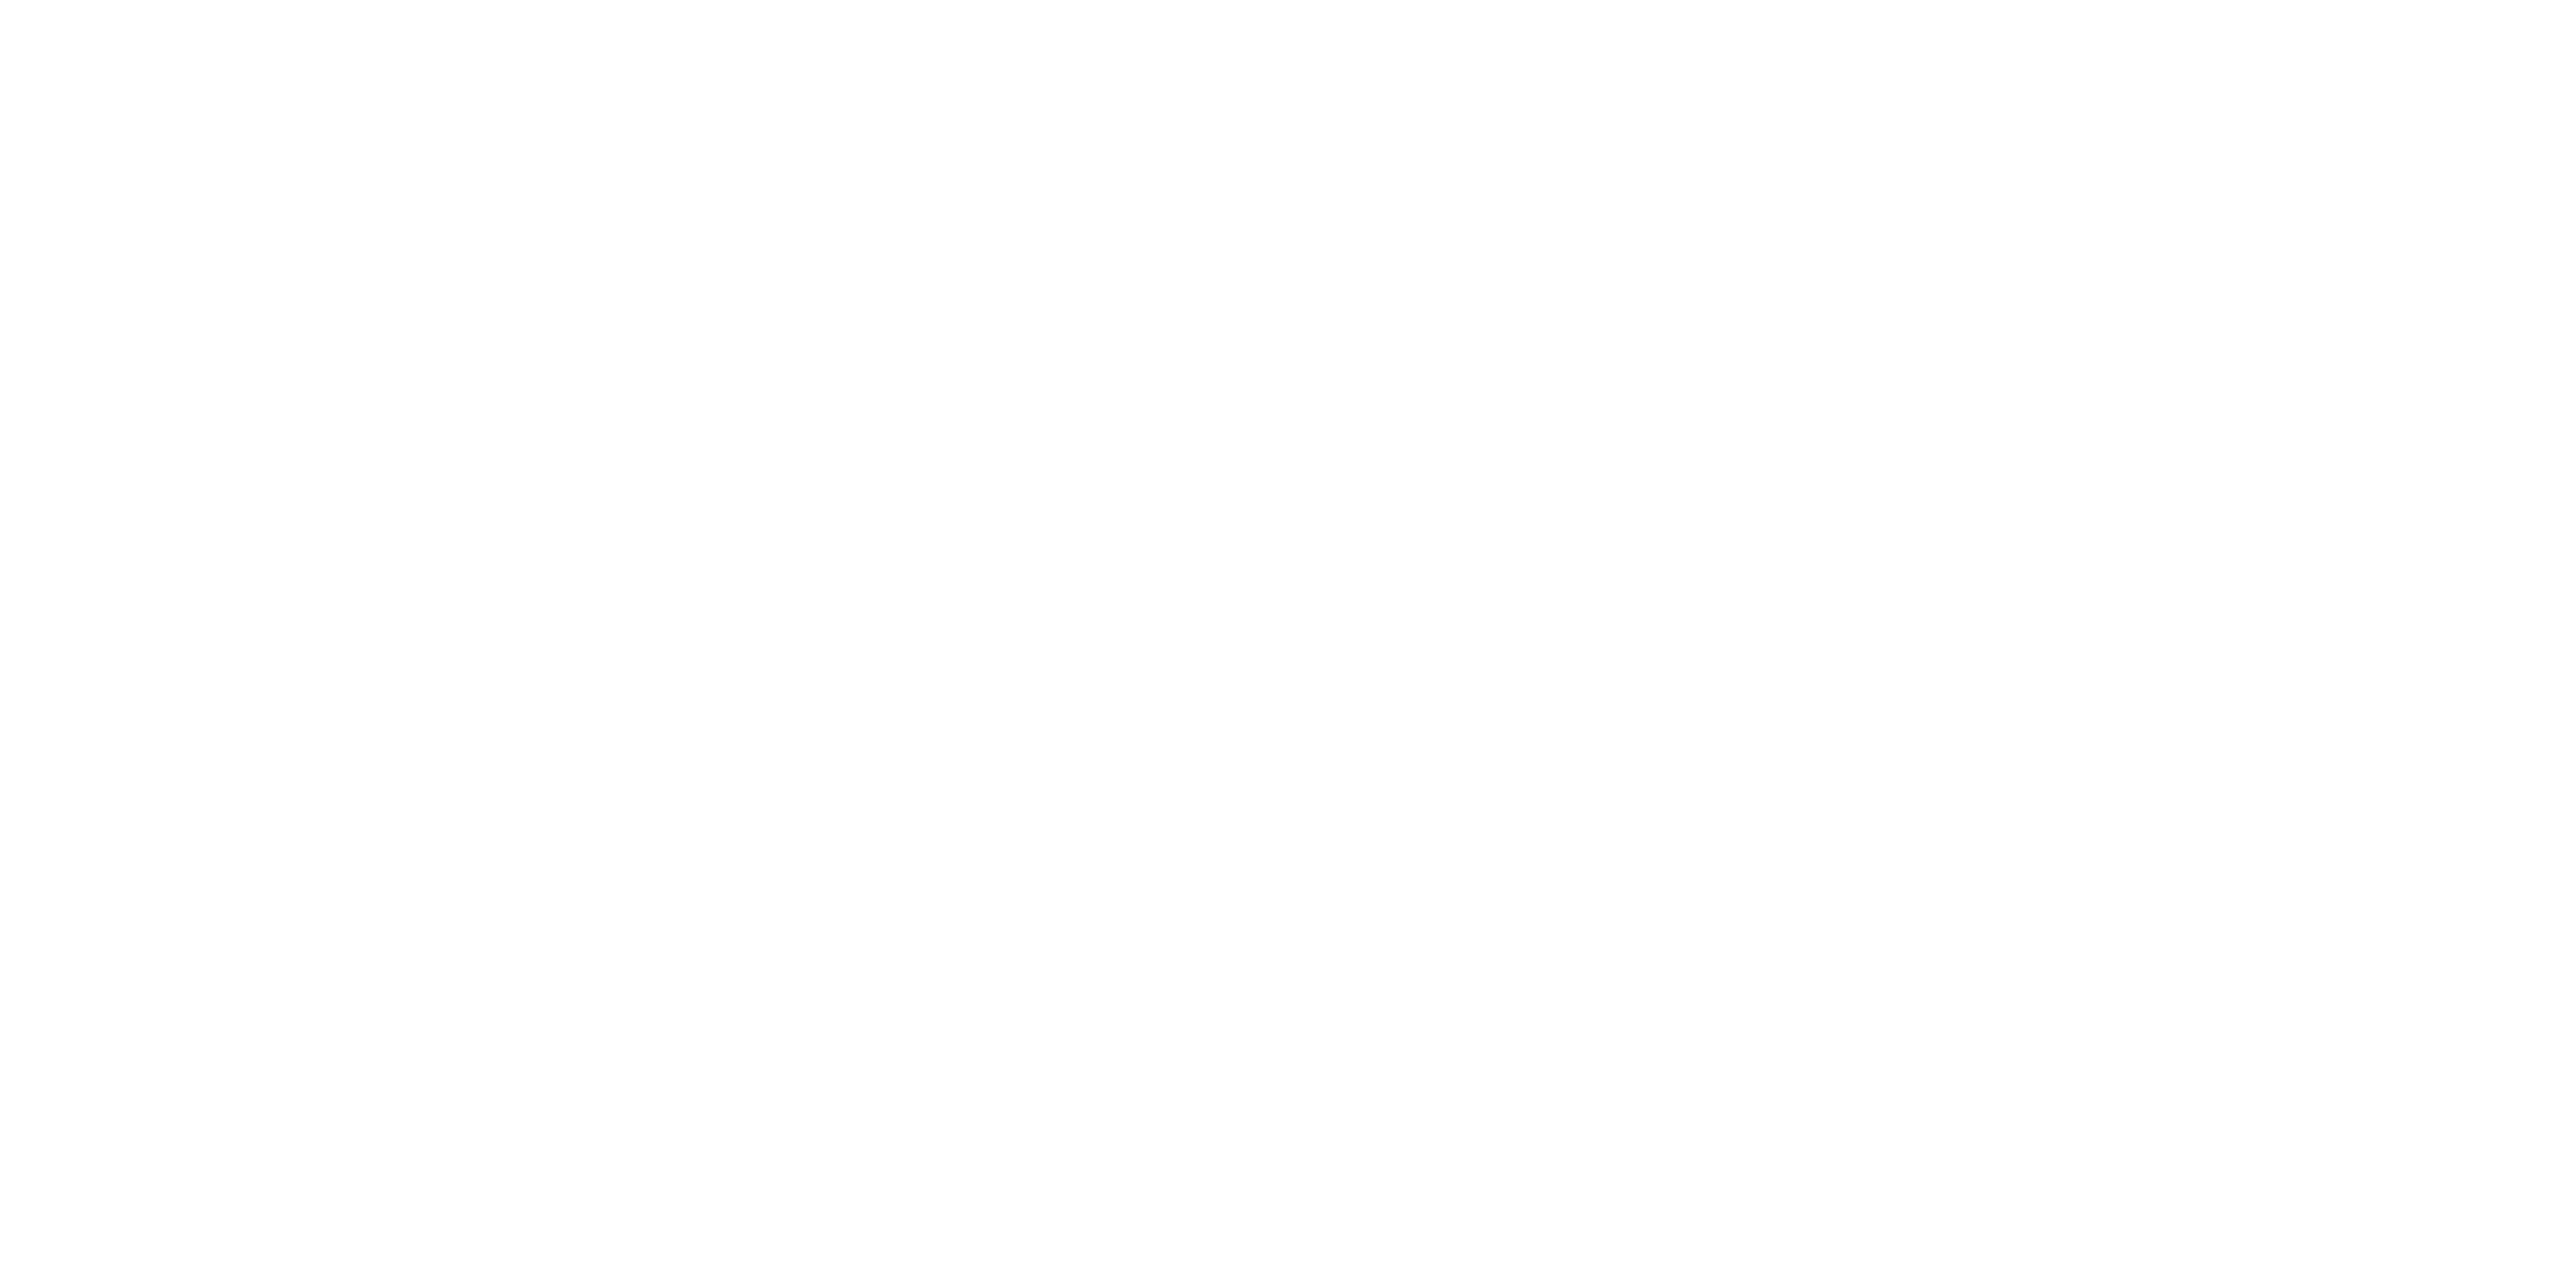

Acorn worm_No light_MSD.csv
Acorn worm
o
(0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)
Akashiwo_Ambient light_Down_MSD.csv
Akashiwo
h
(0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0)
Akashiwo_Ambient light_MSD.csv
Akashiwo
h
(0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0)
Brittletstar_No light_MSD.csv
Brittlestar
1
(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
Ceratium_sp_Fork_Ambient light_MSD.csv
Ceratium_sp_Fork
>
(0.8588235294117647, 0.8588235294117647, 0.5529411764705883, 1.0)
Ceratium_sp_noFork_Ambient light_MSD.csv
Ceratium_sp_noFork
s
(0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0)
Dendraster_No light_MSD.csv
Dendraster
D
(0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0)
Euglena_No light_MSD.csv
Euglena
<
(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)
Polychaete_Day_MSD.csv
Polychaete
P
(0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0)
Polychaet

<IPython.core.display.Javascript object>


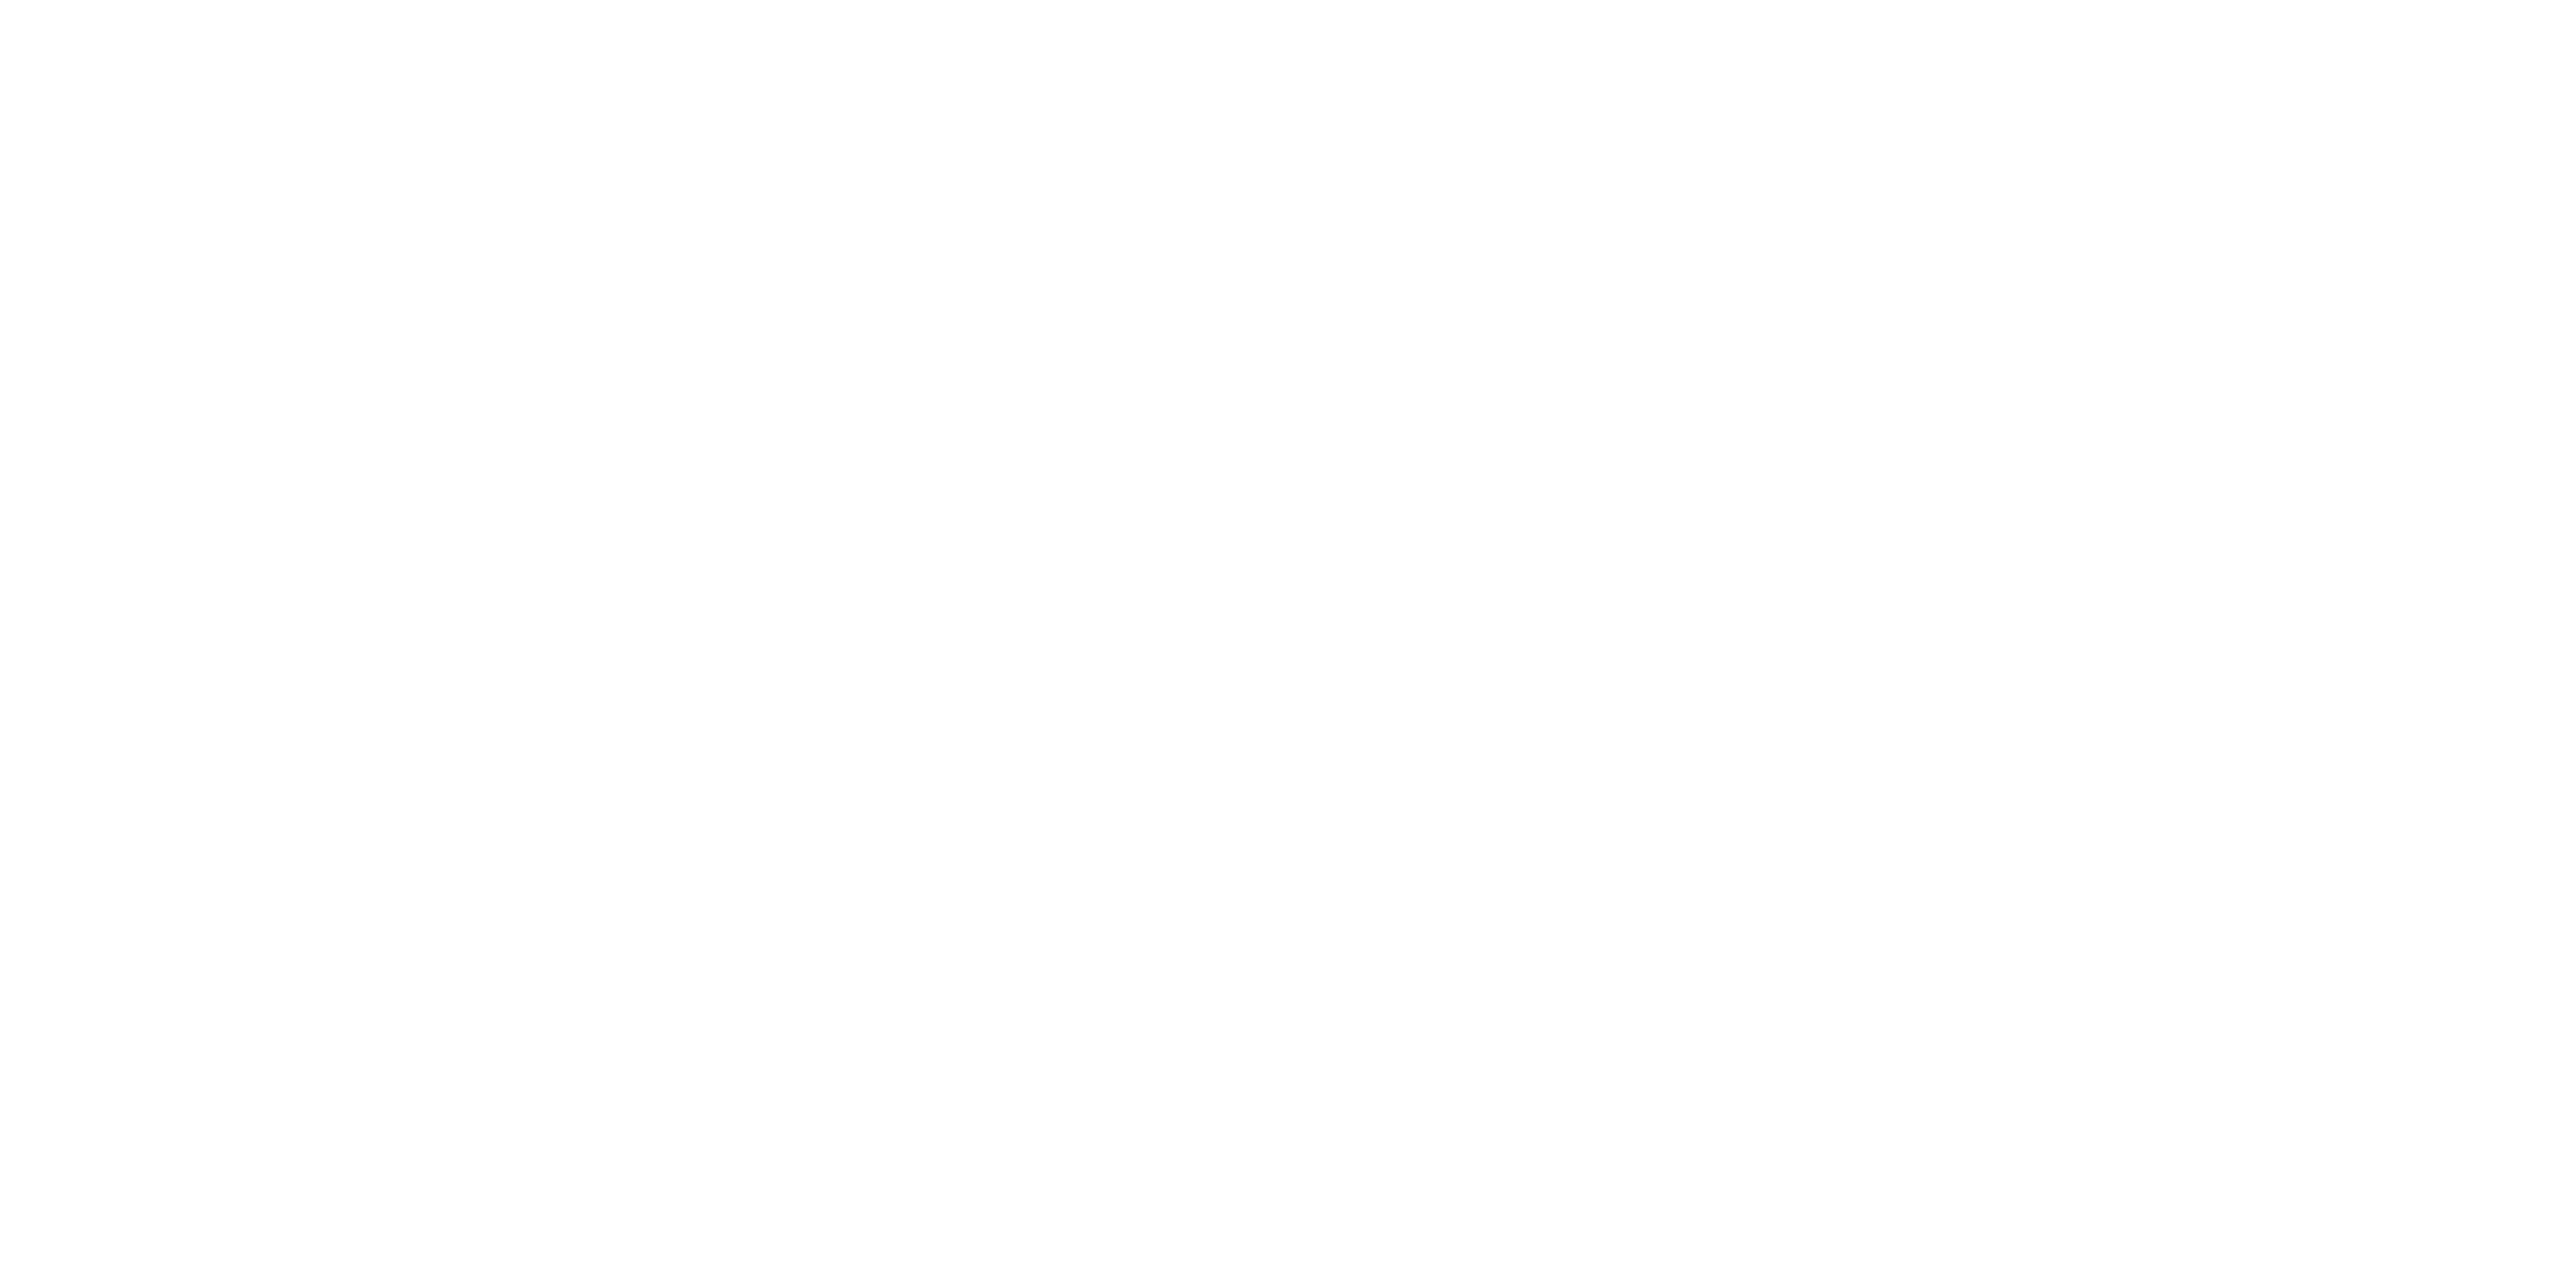

In [40]:
import GravityMachineTrack
import imp
import msdanalyzer
import pandas as pd
import numpy as np
import os
import seaborn as sns
import cmocean
import PlotFunctions.PlotUtils as PlotUtils

from matplotlib import rcParams
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 24})


# Color schemes for plotting
Organisms = ['Sea cucumber','Dendraster','Brittlestar','Acorn worm','Sea urchin','Starfish','Snail','Polychaete','Volvox','Noctiluca','Pyrocystis','Akashiwo', 'Ceratium_sp_noFork', 'Ceratium_sp_Fork', 'Euglena', 'Stentor']

OrganismScientific = {'Acorn worm':'S. californicum','Sea urchin':'S. purpuratus','Sea cucumber':'P. parvimensis','Brittlestar':'O. spiculata','Dendraster':'D. excentricus','Polychaete':'Owenia spp.','Starfish':'P. miniata','Snail':'C. fornicata','Noctiluca':'N. scintillans','Pyrocystis':'P. noctiluca','Volvox':'V. aureus', 'Akashiwo':'A. sanguinea', 'Ceratium_sp_noFork':'Ceratium sp.', 'Ceratium_sp_Fork': 'C. furca', 'Euglena' : 'E. gracilis', 'Stentor': 'S. coeruleus'}
MarkerStyle = {'Acorn worm':'o','Sea urchin':'s','Sea cucumber':'p','Brittlestar':'1','Dendraster':'D','Polychaete':'P','Starfish':'*','Snail':'8','Noctiluca':'x','Pyrocystis':'+','Volvox':'v','Akashiwo':'h', 'Ceratium_sp_noFork':'s', 'Ceratium_sp_Fork': '>', 'Euglena':'<', 'Stentor':'H'}

cmap = plt.get_cmap("tab20")
# cmap = cmocean.cm.matter
# cmap = plt.get_cmap("Accent", 18)

print(cmap.N)

# cmap = sns.hls_palette(len(Organisms), l=.3, s=.8)


cmap_new = []
ColorStyle={}
for ii in np.linspace(int(0),int(cmap.N),len(Organisms),dtype='int'):
    print(ii)
    cmap_new.append(cmap(ii))


for ii, org in enumerate(Organisms):
    ColorStyle[org] = cmap_new[ii]


# Load all the MSD trajectories

msd_folder = 'C:/Users/Deepak/Dropbox/GravityMachine/ExperimentResults/MSD_Analysis/MSD_trajectories'

# os.chdir(msd_folder)

# msd_file = 'msd_combined_csv.csv'

# df = pd.read_csv(msd_file)

files = os.listdir(msd_folder)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))


    

for file in files:
    
    if(file.endswith('csv')):
    
        print(file)
        data = pd.read_csv(os.path.join(msd_folder, file))

        Organism = data['Organism'][0]

        print(Organism)



        delays = data['delays']

        MSD_X = data['MSD_X']
        MSD_Z = data['MSD_Z']

        stdev_X = data['stdev_X']
        stdev_Z = data['stdev_Z']

        print(MarkerStyle[Organism])
        print(ColorStyle[Organism])

    #     PlotUtils.errorfill_sns(delays, MSD_Z, stdev_Z, ax = axes[0], color = ColorStyle[Organism], marker = MarkerStyle[Organism], label = 'Vertical (Z)')
    #     PlotUtils.errorfill_sns(delays, MSD_X, stdev_X, ax = axes[1], color = ColorStyle[Organism], marker = MarkerStyle[Organism], label = 'Horizontal (X)')

    #     sns.relplot(x = delays, y = MSD_Z, ax = axes[0], color = ColorStyle[Organism], marker = MarkerStyle[Organism], label = 'Vertical (Z)')
    #     sns.relplot(x = delays, y = MSD_X, ax = axes[1], color = ColorStyle[Organism], marker = MarkerStyle[Organism], label = 'Horizontal (X)')

        # Plots of Markers
        axes[0].plot(delays[::20],MSD_Z[::20], color = ColorStyle[Organism], marker = MarkerStyle[Organism], MarkerSize = 7, label = Organism, alpha = 0.7)
        axes[1].plot(delays[::20], MSD_X[::20], color = ColorStyle[Organism], marker = MarkerStyle[Organism], MarkerSize = 7, label = Organism, alpha = 0.7)
        
        # Plots of Lines
#         axes[0].plot(delays,MSD_Z, color = ColorStyle[Organism], linewidth = 2, label = Organism, alpha = 0.7)
#         axes[1].plot(delays, MSD_X, color = ColorStyle[Organism], linewidth = 2, label = Organism, alpha = 0.7)
        
        
        axes[0].set_title('Mean-Squared-Displacement - Vertical (Z)')
        axes[1].set_title('Mean-Squared-Displacement - Horizontal (X)')

        legend = plt.legend(prop={'size': 10}, loc = 'best')
        
axes[1].hlines(7.5**2, min(delays), max(delays), linestyle = '--', color = 'k')



plt.savefig(os.path.join(msd_folder, 'Combined_MSD.svg'), dpi = 150)
plt.savefig(os.path.join(msd_folder,'Combined_MSD.png'), dpi = 150)
    

plt.show()
    
    

    
    
    


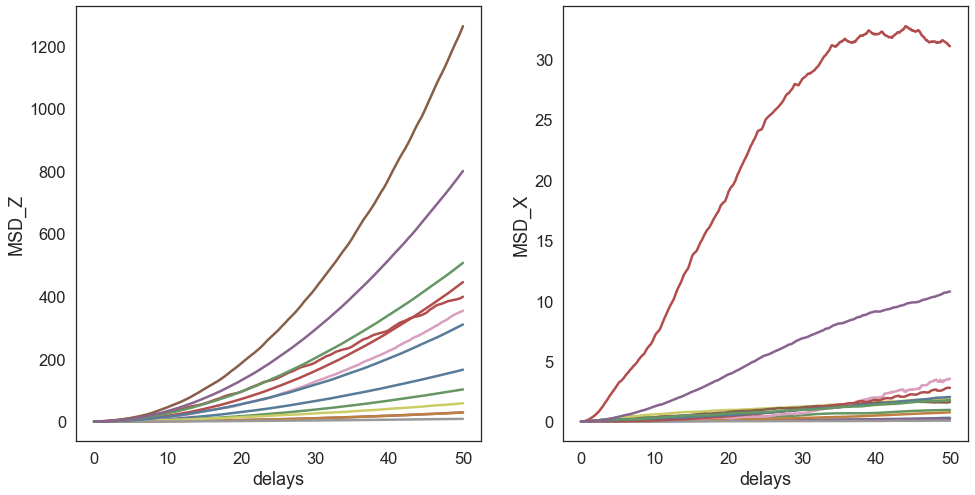

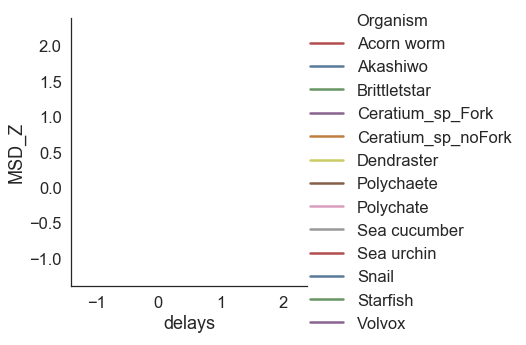

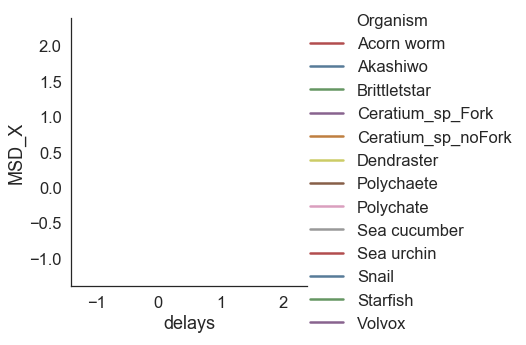

In [34]:
# Plot the MSD curves on top of each other

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("white")

f, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.relplot(x="delays", y="MSD_Z", hue = "Organism", data = df, ax=axes[0], palette = sns.color_palette("Set1", n_colors = 13, desat=.5), legend = "full", kind = "line")
sns.relplot(x="delays", y="MSD_X", hue = "Organism", data = df, ax=axes[1], palette = sns.color_palette("Set1", n_colors = 13, desat=.5), legend = "full", kind = "line")



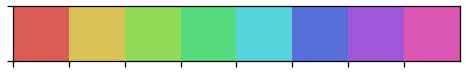

In [27]:
sns.palplot(sns.color_palette("hls", 8))


In [49]:
len(files)

13

In [51]:
print(cmap)

[(0.54, 0.08879999999999995, 0.05999999999999994), (0.54, 0.31033846153846156, 0.05999999999999994), (0.54, 0.5318769230769231, 0.05999999999999994), (0.32658461538461525, 0.54, 0.05999999999999994), (0.10504615384615383, 0.54, 0.05999999999999994), (0.05999999999999994, 0.54, 0.2364923076923078), (0.05999999999999994, 0.54, 0.45803076923076946), (0.05999999999999994, 0.40043076923076887, 0.54), (0.05999999999999994, 0.17889230769230743, 0.54), (0.16264615384615358, 0.05999999999999994, 0.54), (0.3841846153846157, 0.05999999999999994, 0.54), (0.54, 0.05999999999999994, 0.4742769230769225), (0.54, 0.05999999999999994, 0.252738461538461)]


In [53]:
cmap[0]

(0.54, 0.08879999999999995, 0.05999999999999994)

In [57]:
len(cmap)

13

In [58]:
cmap[13]

IndexError: list index out of range

In [59]:
len(files)

13

Acorn worm_No light_MSD.csv
Acorn worm
o
(0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)


<IPython.core.display.Javascript object>


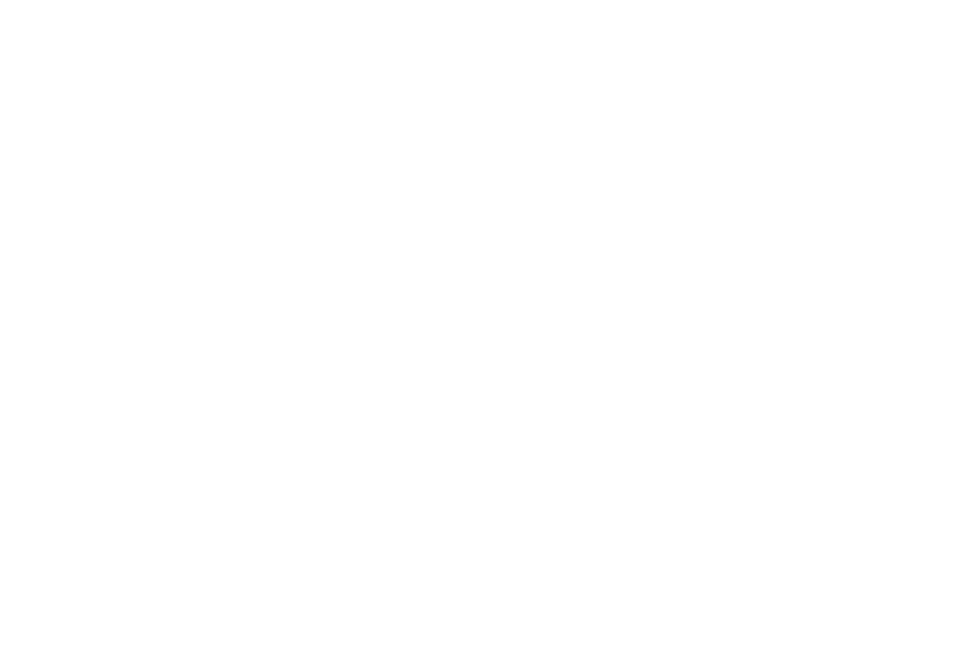

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Akashiwo_Ambient light_Down_MSD.csv
Akashiwo
h
(0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0)
Akashiwo_Ambient light_MSD.csv
Akashiwo
h
(0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0)
Brittletstar_No light_MSD.csv
Brittlestar
1
(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
Ceratium_sp_Fork_Ambient light_MSD.csv
Ceratium_sp_Fork
>
(0.8588235294117647, 0.8588235294117647, 0.5529411764705883, 1.0)
Ceratium_sp_noFork_Ambient light_MSD.csv
Ceratium_sp_noFork
s
(0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0)
Dendraster_No light_MSD.csv
Dendraster
D
(0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0)
Euglena_No light_MSD.csv
Euglena
<
(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)
Polychaete_Day_MSD.csv
Polychaete
P
(0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0)
Polychaete_Night_MSD.csv
Polychaete
P
(0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0)
Sea cucumber_N

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Snail_No light_MSD.csv
Snail
8
(0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0)
Starfish_No light_MSD.csv
Starfish
*
(0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Stentor_No light_MSD.csv
Stentor
H
(0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0)
Volvox_No light_MSD.csv
Volvox
v
(0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)


<IPython.core.display.Javascript object>


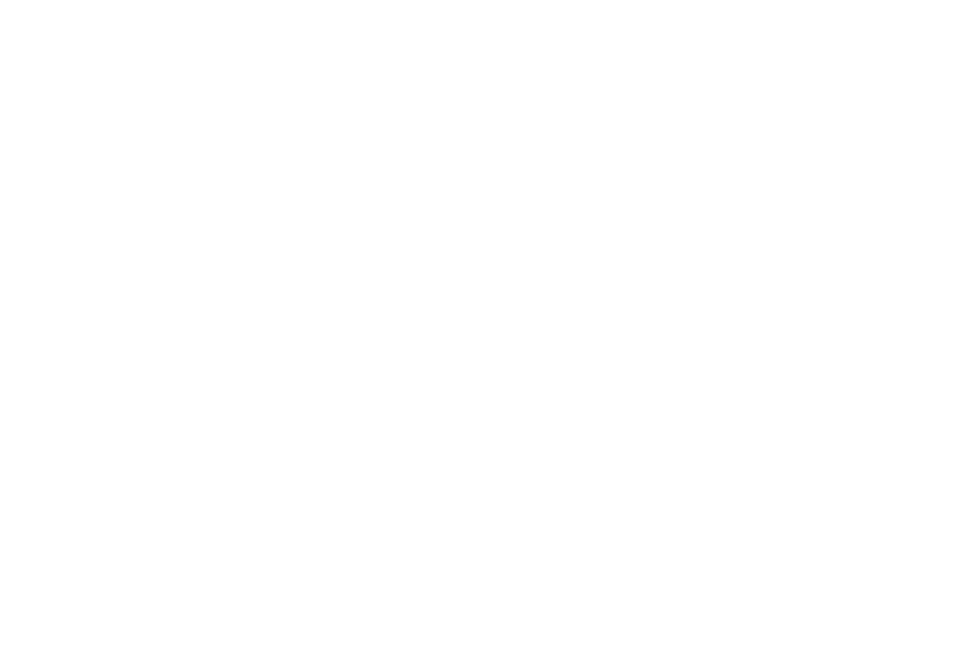

In [41]:
# MSD scaled by organism's size

for file in files:
    
    if(file.endswith('csv')):
    
        print(file)
        data = pd.read_csv(os.path.join(msd_folder, file))

        Organism = data['Organism'][0]

        print(Organism)
        
        OrgSize = data['OrgSize mean']


        delays = data['delays']

        MSD_X_bySize2 = data['MSD_X']/(OrgSize**2)
        MSD_Z_bySize2 = data['MSD_Z']/(OrgSize**2)

        stdev_X_bySize2 = data['stdev_X']/(OrgSize**2)
        stdev_Z_bySize2 = data['stdev_Z']/(OrgSize**2)

        print(MarkerStyle[Organism])
        print(ColorStyle[Organism])

    #     PlotUtils.errorfill_sns(delays, MSD_Z, stdev_Z, ax = axes[0], color = ColorStyle[Organism], marker = MarkerStyle[Organism], label = 'Vertical (Z)')
    #     PlotUtils.errorfill_sns(delays, MSD_X, stdev_X, ax = axes[1], color = ColorStyle[Organism], marker = MarkerStyle[Organism], label = 'Horizontal (X)')

    #     sns.relplot(x = delays, y = MSD_Z, ax = axes[0], color = ColorStyle[Organism], marker = MarkerStyle[Organism], label = 'Vertical (Z)')
    #     sns.relplot(x = delays, y = MSD_X, ax = axes[1], color = ColorStyle[Organism], marker = MarkerStyle[Organism], label = 'Horizontal (X)')

        # Plots of Markers
        axes[0].plot(delays[::20],MSD_Z_bySize2[::20], color = ColorStyle[Organism], marker = MarkerStyle[Organism], MarkerSize = 7, label = Organism, alpha = 0.7)
        axes[1].plot(delays[::20], MSD_X_bySize2[::20], color = ColorStyle[Organism], marker = MarkerStyle[Organism], MarkerSize = 7, label = Organism, alpha = 0.7)
        
        # Plots of Lines
#         axes[0].plot(delays,MSD_Z, color = ColorStyle[Organism], linewidth = 2, label = Organism, alpha = 0.7)
#         axes[1].plot(delays, MSD_X, color = ColorStyle[Organism], linewidth = 2, label = Organism, alpha = 0.7)
        
        
        axes[0].set_title('Mean-Squared-Displacement - Vertical (Z)')
        axes[1].set_title('Mean-Squared-Displacement - Horizontal (X)')

        legend = plt.legend(prop={'size': 10}, loc = 'best')
        
axes[1].hlines(7.5**2, min(delays), max(delays), linestyle = '--', color = 'k')



# plt.savefig(os.path.join(msd_folder, 'Combined_MSD.svg'), dpi = 150)
# plt.savefig(os.path.join(msd_folder,'Combined_MSD.png'), dpi = 150)
    

plt.show()
    
    
